In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [19]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [20]:
Wuqi = df['SiteName'].isin(['梧棲']) #找梧棲測站
df[Wuqi]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460342,461637,梧棲,臺中市,26.0,懸浮微粒,良好,3.6,NaN,NaN,21,...,28.0,7.0,6.8,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460431,461726,梧棲,臺中市,24.0,懸浮微粒,良好,3.0,NaN,NaN,20,...,26.0,5.0,8.3,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460444,461739,梧棲,臺中市,23.0,懸浮微粒,良好,3.2,NaN,NaN,20,...,25.0,5.0,6.8,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460533,461828,梧棲,臺中市,19.0,懸浮微粒,良好,4.2,NaN,NaN,21,...,21.0,4.0,5.3,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460635,461930,梧棲,臺中市,20.0,臭氧,良好,3.2,NaN,NaN,22,...,20.0,4.0,6.3,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460787,462082,梧棲,臺中市,22.0,臭氧,良好,3.6,NaN,NaN,24,...,18.0,4.0,6.7,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460876,462171,梧棲,臺中市,24.0,臭氧,良好,4.4,NaN,NaN,26,...,18.0,4.0,6.4,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461193,462488,梧棲,臺中市,39.0,細懸浮微粒,良好,2.9,NaN,NaN,31,...,28.0,12.0,9.8,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461282,462577,梧棲,臺中市,50.0,細懸浮微粒,良好,2.7,NaN,NaN,32,...,36.0,15.0,11.9,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461371,462666,梧棲,臺中市,51.0,細懸浮微粒,普通,2.9,NaN,NaN,33,...,40.0,16.0,11.0,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [21]:
Wuqi = df['SiteName'].isin(['梧棲']) #找梧棲測站
Wuqi=df[Wuqi].fillna(method='ffill').drop(columns=['CO','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column

Wuqi

,SO2,O3,PM10,PM25,NO2
0,3.6,21,28.0,7.0,6.8
1,3.0,20,26.0,5.0,8.3
2,3.2,20,25.0,5.0,6.8
3,4.2,21,21.0,4.0,5.3
4,3.2,22,20.0,4.0,6.3
5,3.6,24,18.0,4.0,6.7
6,4.4,26,18.0,4.0,6.4
7,2.9,31,28.0,12.0,9.8
8,2.7,32,36.0,15.0,11.9
9,2.9,33,40.0,16.0,11.0


In [22]:
bbb=Wuqi['PM10']>50
#Wuqi['PM10']=Wuqi['PM10'].astype("int")
#Wuqi['PM10']=Wuqi['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Wuqi['PM10'].replace(2,np.nan, inplace=True)


In [23]:
Wuqi.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
 
Wuqi

,SO2,O3,PM10,PM25,NO2
0,3.6,21,28.0,7.0,6.8
1,3.0,20,26.0,5.0,8.3
2,3.2,20,25.0,5.0,6.8
3,4.2,21,21.0,4.0,5.3
4,3.2,22,20.0,4.0,6.3
5,3.6,24,18.0,4.0,6.7
6,4.4,26,18.0,4.0,6.4
7,2.9,31,28.0,12.0,9.8
8,2.7,32,36.0,15.0,11.9
9,2.9,33,40.0,16.0,11.0


In [24]:
aaa=Wuqi['PM10']>200
Wuqi[aaa]

,SO2,O3,PM10,PM25,NO2


In [25]:
Wuqi.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Wuqi

,SO2,O3,PM10,PM25,NO2
0,3.6,21,28.0,7.0,6.8
1,3.0,20,26.0,5.0,8.3
2,3.2,20,25.0,5.0,6.8
3,4.2,21,21.0,4.0,5.3
4,3.2,22,20.0,4.0,6.3
5,3.6,24,18.0,4.0,6.7
6,4.4,26,18.0,4.0,6.4
7,2.9,31,28.0,12.0,9.8
8,2.7,32,36.0,15.0,11.9
9,2.9,33,40.0,16.0,11.0


In [26]:
Wuqi['pr']=''
Wuqi.drop([ 0,1],inplace=True)
Wuqi.reset_index(drop=True,inplace=True)
#000

Wuqi.to_csv('Wuqipollution.csv')

Wuqi

,SO2,O3,PM10,PM25,NO2,pr
0,3.2,20,25.0,5.0,6.8,
1,4.2,21,21.0,4.0,5.3,
2,3.2,22,20.0,4.0,6.3,
3,3.6,24,18.0,4.0,6.7,
4,4.4,26,18.0,4.0,6.4,
5,2.9,31,28.0,12.0,9.8,
6,2.7,32,36.0,15.0,11.9,
7,2.9,33,40.0,16.0,11.0,
8,3.1,34,52.0,18.0,11.3,
9,3.4,35,71.0,23.0,10.2,


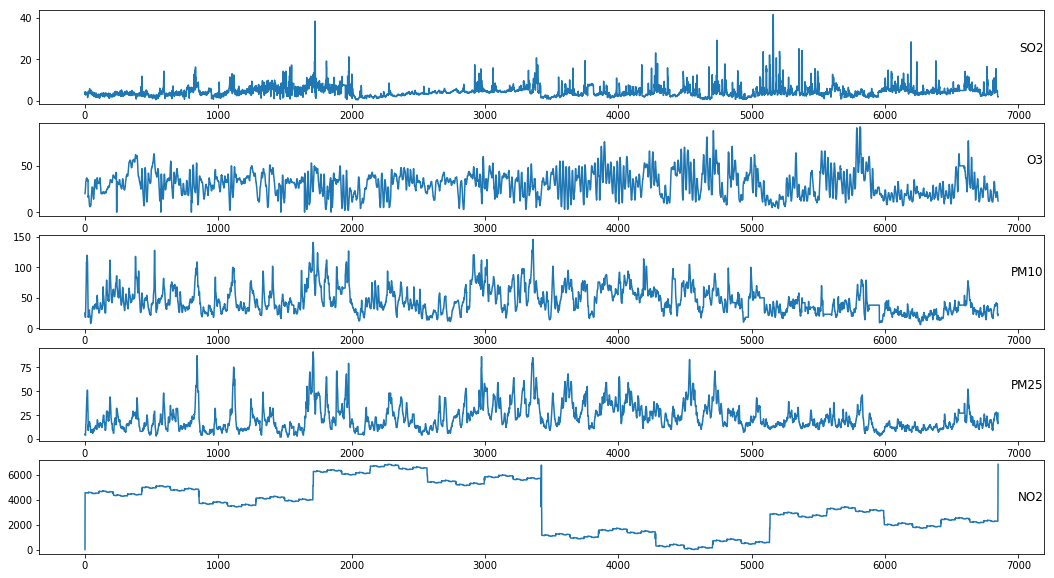

In [27]:
# load dataset
dataset =pd.read_csv('Wuqipollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [28]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,O3,PM10,PM25,NO2,pr
0,-0.461654,-0.785704,-0.974896,-1.292133,-0.841319,5.0
1,-0.082883,-0.712312,-1.160713,-1.365683,-1.064538,4.0
2,-0.461654,-0.638921,-1.207168,-1.365683,-0.915726,4.0
3,-0.310145,-0.492138,-1.300076,-1.365683,-0.856200,4.0
4,-0.007129,-0.345355,-1.300076,-1.365683,-0.900844,4.0
5,-0.575285,0.021603,-0.835533,-0.777279,-0.394881,12.0
6,-0.651039,0.094994,-0.463899,-0.556628,-0.082374,15.0
7,-0.575285,0.168386,-0.278082,-0.483077,-0.216305,16.0
8,-0.499531,0.241777,0.279370,-0.335976,-0.171662,18.0
9,-0.385899,0.315169,1.162002,0.031776,-0.335356,23.0


In [29]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [30]:
'''
#將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
'''

'\n#將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X,Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]\n'

In [31]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
from sklearn.utils import shuffle 

In [32]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data
def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 5))`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
_________________________________________________________________
activation_6 (Activation)    (None, 7)                 0         
Total para

5532/5532 [==============================] - 0s 46us/step - loss: 17.8699 - val_loss: 17.9585
Epoch 66/500
5532/5532 [==============================] - 0s 43us/step - loss: 17.2477 - val_loss: 17.3180
Epoch 67/500
5532/5532 [==============================] - 0s 41us/step - loss: 17.1370 - val_loss: 16.7049
Epoch 68/500
5532/5532 [==============================] - 0s 41us/step - loss: 16.8047 - val_loss: 17.3160
Epoch 69/500
5532/5532 [==============================] - 0s 41us/step - loss: 16.9467 - val_loss: 16.9628
Epoch 70/500
5532/5532 [==============================] - 0s 42us/step - loss: 17.0788 - val_loss: 17.0864
Epoch 71/500
5532/5532 [==============================] - 0s 41us/step - loss: 16.6444 - val_loss: 17.0528
Epoch 72/500
5532/5532 [==============================] - 0s 43us/step - loss: 16.1128 - val_loss: 16.3699
Epoch 73/500
5532/5532 [==============================] - 0s 56us/step - loss: 15.7947 - val_loss: 16.4599
Epoch 74/500
5532/5532 [==========================

5532/5532 [==============================] - 0s 40us/step - loss: 9.5600 - val_loss: 11.2433
Epoch 142/500
5532/5532 [==============================] - 0s 40us/step - loss: 9.9070 - val_loss: 11.1125
Epoch 143/500
5532/5532 [==============================] - 0s 42us/step - loss: 9.9757 - val_loss: 12.6376
Epoch 144/500
5532/5532 [==============================] - 0s 41us/step - loss: 9.5880 - val_loss: 10.9569
Epoch 145/500
5532/5532 [==============================] - 0s 44us/step - loss: 9.6231 - val_loss: 11.6943
Epoch 146/500
5532/5532 [==============================] - 0s 39us/step - loss: 10.0611 - val_loss: 12.0001
Epoch 147/500
5532/5532 [==============================] - 0s 40us/step - loss: 9.8425 - val_loss: 11.1049
Epoch 148/500
5532/5532 [==============================] - 0s 42us/step - loss: 9.5801 - val_loss: 11.2580
Epoch 149/500
5532/5532 [==============================] - 0s 41us/step - loss: 9.4584 - val_loss: 11.0101
Epoch 150/500
5532/5532 [=========================

5532/5532 [==============================] - 0s 44us/step - loss: 7.3644 - val_loss: 8.4081
Epoch 219/500
5532/5532 [==============================] - 0s 43us/step - loss: 7.1666 - val_loss: 8.7839
Epoch 220/500
5532/5532 [==============================] - 0s 45us/step - loss: 7.3494 - val_loss: 8.6019
Epoch 221/500
5532/5532 [==============================] - 0s 44us/step - loss: 7.2900 - val_loss: 8.5206
Epoch 222/500
5532/5532 [==============================] - 0s 52us/step - loss: 7.1545 - val_loss: 8.5066
Epoch 223/500
5532/5532 [==============================] - 0s 42us/step - loss: 7.1338 - val_loss: 8.4737
Epoch 224/500
5532/5532 [==============================] - 0s 53us/step - loss: 7.2806 - val_loss: 8.4151
Epoch 225/500
5532/5532 [==============================] - 0s 43us/step - loss: 7.2795 - val_loss: 9.3949
Epoch 226/500
5532/5532 [==============================] - 0s 41us/step - loss: 7.5442 - val_loss: 9.1655
Epoch 227/500
5532/5532 [==============================] - 0

5532/5532 [==============================] - 0s 43us/step - loss: 6.0625 - val_loss: 7.6125
Epoch 296/500
5532/5532 [==============================] - 0s 43us/step - loss: 6.1384 - val_loss: 8.0472
Epoch 297/500
5532/5532 [==============================] - 0s 44us/step - loss: 6.0696 - val_loss: 7.6061
Epoch 298/500
5532/5532 [==============================] - 0s 41us/step - loss: 6.0199 - val_loss: 7.7176
Epoch 299/500
5532/5532 [==============================] - 0s 43us/step - loss: 6.1469 - val_loss: 6.9027
Epoch 300/500
5532/5532 [==============================] - 0s 46us/step - loss: 6.1347 - val_loss: 7.2511
Epoch 301/500
5532/5532 [==============================] - 0s 44us/step - loss: 6.1636 - val_loss: 6.9667
Epoch 302/500
5532/5532 [==============================] - 0s 47us/step - loss: 6.0336 - val_loss: 7.5005
Epoch 303/500
5532/5532 [==============================] - 0s 41us/step - loss: 5.9346 - val_loss: 7.5738
Epoch 304/500
5532/5532 [==============================] - 0

5532/5532 [==============================] - 0s 40us/step - loss: 5.2606 - val_loss: 6.9947
Epoch 373/500
5532/5532 [==============================] - 0s 41us/step - loss: 5.2303 - val_loss: 6.5057
Epoch 374/500
5532/5532 [==============================] - 0s 40us/step - loss: 5.2264 - val_loss: 7.1886
Epoch 375/500
5532/5532 [==============================] - 0s 42us/step - loss: 5.3970 - val_loss: 6.7735
Epoch 376/500
5532/5532 [==============================] - 0s 41us/step - loss: 5.1795 - val_loss: 6.4692
Epoch 377/500
5532/5532 [==============================] - 0s 41us/step - loss: 5.2345 - val_loss: 6.8005
Epoch 378/500
5532/5532 [==============================] - 0s 45us/step - loss: 5.0819 - val_loss: 6.5205
Epoch 379/500
5532/5532 [==============================] - 0s 41us/step - loss: 5.0650 - val_loss: 7.0428
Epoch 380/500
5532/5532 [==============================] - 0s 51us/step - loss: 5.1621 - val_loss: 6.6986
Epoch 381/500
5532/5532 [==============================] - 0

5532/5532 [==============================] - 0s 41us/step - loss: 4.8682 - val_loss: 6.3308
Epoch 450/500
5532/5532 [==============================] - 0s 41us/step - loss: 4.7716 - val_loss: 6.0856
Epoch 451/500
5532/5532 [==============================] - 0s 43us/step - loss: 4.7349 - val_loss: 6.0883
Epoch 452/500
5532/5532 [==============================] - 0s 47us/step - loss: 4.6482 - val_loss: 6.1908
Epoch 453/500
5532/5532 [==============================] - 0s 41us/step - loss: 4.6456 - val_loss: 6.4711
Epoch 454/500
5532/5532 [==============================] - 0s 42us/step - loss: 4.7251 - val_loss: 6.1901
Epoch 455/500
5532/5532 [==============================] - 0s 41us/step - loss: 4.7406 - val_loss: 6.2603
Epoch 456/500
5532/5532 [==============================] - 0s 41us/step - loss: 4.6446 - val_loss: 5.7461
Epoch 457/500
5532/5532 [==============================] - 0s 41us/step - loss: 4.4302 - val_loss: 5.9340
Epoch 458/500
5532/5532 [==============================] - 0

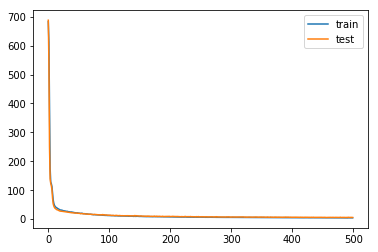

In [33]:
#model
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Wuqimodel.h5')
del model

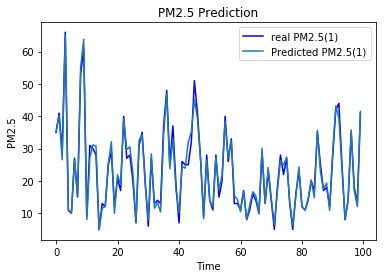

Train 1.0704408654628275
Validation 0.7101024890190337
1.2853252166416804e+36
The R2 score on the Test set is:	0.963
Train Score: 1.66 RMSE
Test Score: 2.56 RMSE
The MSE   on the Test set is: 6.537914147505057
The RMSE  on the Test set is: 2.556934521552137
The MAE   on the Test set is: 1.8020474581607737
The MAPE  on the Test set is: 0.014835611455475467
The SMAPE on the Test set is: 0.01412571221046453


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [34]:
#讀取model3
model = load_model('Wuqimodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

